# Diversificación y fuentes de riesgo en un portafolio II - Una ilustración con mercados internacionales.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/5/5f/Map_International_Markets.jpg" width="500px" height="300px" />

> Entonces, la clase pasada vimos cómo afecta la correlación entre pares de activos en un portafolio. Dijimos que como un par de activos nunca tienen correlación perfecta, al combinarlos en un portafolio siempre conseguimos diversificación del riesgo.

> Vimos también que no todo el riesgo se puede diversificar. Dos fuentes de riesgo:
> - Sistemático: afecta de igual manera a todos los activos. No se puede diversificar.
> - Idiosincrático: afecta a cada activo en particular por razones específicas. Se puede diversificar.

En esta clase veremos un ejemplo de diversificación en un portafolio, usando datos de mercados de activos internacionales.

En el camino, definiremos términos como *frontera media/varianza*, *portafolio de varianza mínima* y *portafolios eficientes*, los cuales son básicos para la construcción de la **teoría moderna de portafolios**.

Estos portafolios los aprenderemos a obtener formalmente en el siguiente módulo. Por ahora nos bastará con agarrar intuición.

**Objetivo:**
- Ver los beneficios de la diversificación ilustrativamente.
- ¿Qué es la frontera media/varianza?
- ¿Qué son el portafolio de varianza mínima y portafolios eficientes?

*Referencia:*
- Notas del curso "Portfolio Selection and Risk Management", Rice University, disponible en Coursera.
___

## Ejemplo

**Los datos:** tenemos el siguiente reporte de rendimientos esperados y volatilidad (anuales) para los mercados de acciones en los países integrandes del $G5$: EU, RU, Francia, Alemania y Japón.

In [1]:
import pandas as pd
import numpy as np

In [2]:
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


¿Qué podemos notar?
- 
- 

Además, tenemos el siguiente reporte de la matriz de correlación:

In [6]:
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


¿Qué se puede observar?
- 
- 

Recordar: correlaciones bajas significan una gran oportunidad para diversificación.

### Nos enfocaremos entonces únicamente en dos mercados: EU y Japón

- ¿Cómo construiríamos un portafolio que consiste de los mercados de acciones de EU y Japón?
- ¿Cuáles serían las posibles combinaciones?

#### 1. Supongamos que $w$ es la participación del mercado de EU en nuestro portafolio.
- ¿Cuál es la participación del mercado de Japón entonces?

- Luego, nuestras fórmulas de rendimiento esperado y varianza de portafolios son:

$$Rendimiento$$

$$Varianza$$

#### 2. Con lo anterior...
- podemos variar $w$ con pasos pequeños entre $0$ y $1$, y
- calcular el rendimiento esperado y volatilidad para cada valor de $w$.

In [13]:
w = np.linspace(0, 1, 21)

In [18]:
portafolios = pd.DataFrame(columns=['Rend', 'Vol'], index = w)
portafolios.index.name = 'w'
portafolios.Rend = w*annual_ret_summ['EU']['Media']+(1-w)*annual_ret_summ['Japon']['Media']
portafolios.Vol = np.sqrt((w*annual_ret_summ['EU']['Volatilidad'])**2+((1-w)*annual_ret_summ['Japon']['Volatilidad'])**2+2*w*(1-w)*annual_ret_summ['EU']['Volatilidad']*annual_ret_summ['Japon']['Volatilidad']*corr['EU']['Japon'])

portafolios.round(4)

,Rend,Vol
w,,
0.00,0.1497,0.2298
0.05,0.1490,0.2205
0.10,0.1483,0.2114
0.15,0.1476,0.2027
0.20,0.1469,0.1943
0.25,0.1462,0.1863
0.30,0.1454,0.1787
0.35,0.1447,0.1717
0.40,0.1440,0.1652


#### 3. Finalmente, 
- cada una de las combinaciones las podemos graficar en el espacio de rendimiento esperado (eje $y$) contra volatilidad (eje $x$).

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

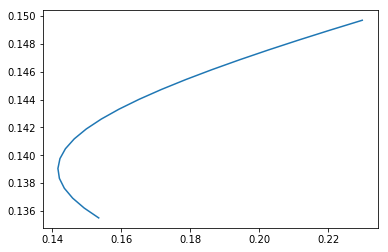

In [20]:
plt.plot(portafolios['Vol'], portafolios['Rend'])

#### De la gráfica,
1. ¿Conviene invertir 100% en el mercado de EU? ¿Porqué?
2. ¿Porqué ocurre esto?
3. Definición: frontera media/varianza.
4. Definición: portafolio de varianza mínima.
5. Definición: portafolios eficientes.

# Anuncios parroquiales

## 1. Recordar quiz la próxima clase.
## 2. Revisar archivo de la Tarea 5.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>